In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
series_past = read_csv('Past_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

training = series_past.values

In [3]:
series_current = read_csv('Actual_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

test = series_current.values

In [4]:
lags=1000
model = AutoReg(training, lags=lags, old_names=False)
model_fit = model.fit()
print('Lags:', lags)
# print('Coefficients: %s' % model_fit.params)
print()

Lags: 1000



In [5]:
predictions = model_fit.predict(start=len(training), end=len(training)+len(test)-1, dynamic=False)
# for i in range(len(predictions)):
#     print('predicted=%f, actual=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
MAE = mean_absolute_error(test, predictions)
print("Lag 50: 2797.858")
print("Lag 100: 2763.947")
print("Lag 200: 2659.908")
print("Lag 500: 2580.148")
print("Lag 1000: 2571.554")
print("Lag 2000: 2354.487")
print("Lag 5000: 2342.198") #This took quite a while on my laptop
print()
print('Test MAE: %.3f' % MAE)
print('Test RMSE: %.3f' % rmse)

Lag 50: 2797.858
Lag 100: 2763.947
Lag 200: 2659.908
Lag 500: 2580.148
Lag 1000: 2571.554
Lag 2000: 2354.487
Lag 5000: 2342.198

Test MAE: 2056.098
Test RMSE: 2571.554


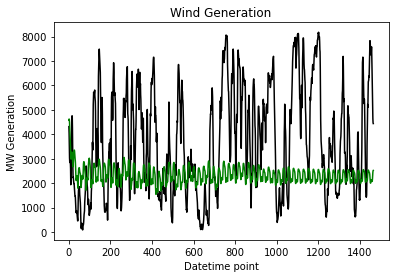

In [6]:
pyplot.plot(test, color='black')
pyplot.plot(predictions, color='green')

pyplot.xlabel('Datetime point')
pyplot.ylabel('MW Generation')
pyplot.title('Wind Generation')
pyplot.show()

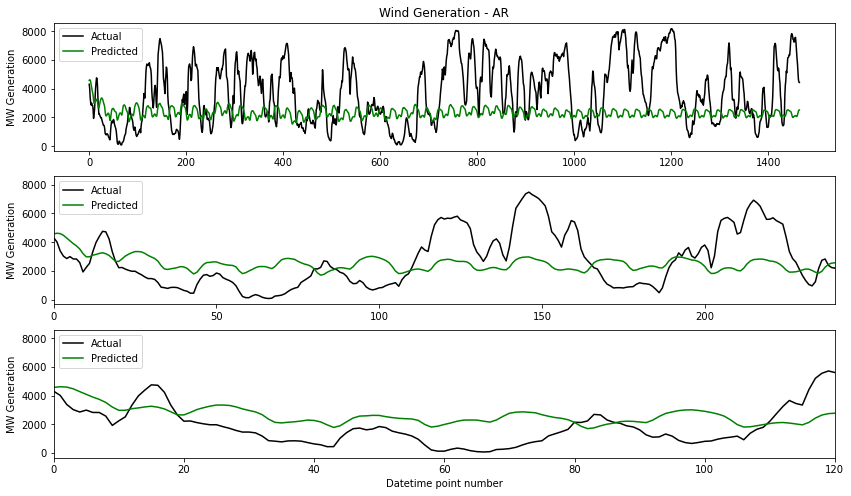

In [8]:
plot = pyplot.figure(figsize=(14,8))

ax1 = plot.add_subplot(311)
pyplot.plot(test, color='black')
pyplot.plot(predictions, color='green')
pyplot.ylabel('MW Generation')
pyplot.title('Wind Generation - AR')
pyplot.gca().legend(('Actual','Predicted'), loc='upper left')
#
ax2 = plot.add_subplot(312)
pyplot.plot(test, color='black')
pyplot.plot(predictions, color='green')
ax2.set_xlim([0, 240])
pyplot.ylabel('MW Generation')
pyplot.gca().legend(('Actual','Predicted'), loc='upper left')
#
ax3 = plot.add_subplot(313)
pyplot.plot(test, color='black')
pyplot.plot(predictions, color='green')
ax3.set_xlim([0, 120])
pyplot.xlabel('Datetime point number')
pyplot.ylabel('MW Generation')
pyplot.gca().legend(('Actual','Predicted'), loc='upper left')
#
pyplot.savefig('AR_Graph.png')